## Pandas

As you may know, Pandas (in addition to Numpy) is the go-to Python library for all your data science needs. It helps with dealing with input data in CSV formats and with transforming your data into a form where it can be inputted into ML models. However, getting comfortable with the ideas of dataframes, slicing, etc was very tough for me in the beginning. Hopefully, this short tutorial can show you a lot of different commands that will help you gain the most insights into your dataset. 

In [2]:
import pandas as pd

# Loading in Data

The first step in any ML problem is identifying what format your data is in, and then loading it into whatever framework you're using. A lot of data can be found in CSV files, so that's the example we're going to use. 

Since I'm a huge sports fan, we're going to be looking at a sports dataset that shows the results from NCAA basketball games from 1985 to 2016. This dataset is in a CSV file, and the function we're going to use to read in the file is called **pd.read_csv()**. This function returns a **dataframe** variable. The dataframe is the golden jewel data structure for Pandas. It is defined as "a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)".

Just think of it as a table for now. 

In [3]:
df = pd.read_csv('RegularSeasonCompactResults.csv')

# The Basics

Now that we have our dataframe in our variable df, let's look at what it contains. We can use the function **head()** to see the first couple rows of the dataframe (or the function **tail()** to see the last few rows).

In [3]:
df.head(10)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
5,1985,25,1218,79,1337,78,H,0
6,1985,25,1228,64,1226,44,N,0
7,1985,25,1242,58,1268,56,N,0
8,1985,25,1260,98,1133,80,H,0
9,1985,25,1305,97,1424,89,H,0


In [4]:
df.tail()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
145284,2016,132,1114,70,1419,50,N,0
145285,2016,132,1163,72,1272,58,N,0
145286,2016,132,1246,82,1401,77,N,1
145287,2016,132,1277,66,1345,62,N,0
145288,2016,132,1386,87,1433,74,N,0


We can see the dimensions of the dataframe using the the **shape** attribute

In [5]:
df.shape

(145289, 8)

We can also extract all the column names as a list, by using the **columns** attribute and can extract the rows with the **index** attribute

In [6]:
df.columns.tolist()

['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Wloc', 'Numot']

In order to get a better idea of the type of data that we are dealing with, we can call the **describe()** function to see statistics like mean, min, etc about each column of the dataset. 

In [7]:
df.describe()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot
count,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000
mean,2001.574834,75.223816,1286.720646,76.600321,1282.864064,64.497009,0.044387
std,9.233342,33.287418,104.570275,12.173033,104.829234,11.380625,0.247819
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1994.000000,47.000000,1198.000000,68.000000,1191.000000,57.000000,0.000000
50%,2002.000000,78.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2010.000000,103.000000,1379.000000,84.000000,1375.000000,72.000000,0.000000
max,2016.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


Okay, so now let's looking at information that we want to extract from the dataframe. Let's say I wanted to know the max value of a certain column. The function **max()** will show you the maximum values of all columns

In [8]:
df.max()

Season    2016
Daynum     132
Wteam     1464
Wscore     186
Lteam     1464
Lscore     150
Wloc         N
Numot        6
dtype: object

Then, if you'd like to specifically get the max value for a particular column, you pass in the name of the column using the bracket indexing operator

In [9]:
df['Wscore'].max()

186

If you'd like to find the mean of the Losing teams' score. 

In [10]:
df['Lscore'].mean()

64.49700940883343

But what if that's not enough? Let's say we want to actually see the game(row) where this max score happened. We can call the **idxmax()** function to identify the row index

In [11]:
df['Wscore'].idxmax()

24970

One of the most useful functions that you can call on certain columns in a dataframe is the **value_counts()** function. It shows how many times each item appears in the column. This particular command shows the number of games in each season

In [12]:
df['Season'].value_counts()

2016    5369
2014    5362
2015    5354
2013    5320
2010    5263
2012    5253
2009    5249
2011    5246
2008    5163
2007    5043
2006    4757
2005    4675
2003    4616
2004    4571
2002    4555
2000    4519
2001    4467
1999    4222
1998    4167
1997    4155
1992    4127
1991    4123
1996    4122
1995    4077
1994    4060
1990    4045
1989    4037
1993    3982
1988    3955
1987    3915
1986    3783
1985    3737
Name: Season, dtype: int64

# Acessing Values

Then, in order to get attributes about the game, we need to use the **iloc[ ]** function. Iloc is definitely one of the more important functions. The main idea is that you want to use it whenever you have the integer index of a certain row that you want to access. As per Pandas documentation, iloc is an **"integer-location based indexing for selection by position."**

In [13]:
print(df['Wscore'].idxmax())
df.iloc[[df['Wscore'].idxmax()]]

24970


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
24970,1991,68,1258,186,1109,140,H,0


Let's take this a step further. Let's say you want to know the game with the highest scoring winning team (this is what we just calculated), but you then want to know how many points the losing team scored. 

In [14]:
df.iloc[[df['Wscore'].idxmax()]]['Lscore']


24970    140
Name: Lscore, dtype: int64

When you see data displayed in the above format, you're dealing with a Pandas **Series** object, not a dataframe object.

In [15]:
type(df.iloc[[df['Wscore'].idxmax()]]['Lscore'])

pandas.core.series.Series

In [16]:
type(df.iloc[[df['Wscore'].idxmax()]])

pandas.core.frame.DataFrame

The other really important function in Pandas is the **loc** function. 

Below is an example of how you can use loc to acheive the same task as we did previously with iloc

In [17]:
df.loc[df['Wscore'].idxmax(), 'Lscore']

140

If you'd like to see more discussion on how loc and iloc are different, check out this great Stack Overflow post: http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation. Just remember that **iloc looks at position** and **loc looks at labels**. Loc becomes very important when your row labels aren't integers. 

# Sorting

Let's say that we want to sort the dataframe in increasing order for the scores of the losing team

In [18]:
df.sort_values('Lscore',axis=0, ascending=False).head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
17867,1989,92,1258,181,1109,150,H,0
16853,1989,68,1258,162,1109,144,A,0
22074,1990,96,1261,148,1258,141,H,0
24970,1991,68,1258,186,1109,140,H,0
1126,1985,65,1424,142,1429,140,A,0


# Filtering Rows Conditionally

Now, let's say we want to find all of the rows that satisy a particular condition. For example, I want to find all of the games where the winning team scored more than 150 points. The idea behind this command is you want to access the column 'Wscore' of the dataframe df (df['Wscore']), find which entries are above 150 (df['Wscore'] > 150), and then returns only those specific rows in a dataframe format (df[df['Wscore'] > 150]).

In [19]:
df[df['Wscore'] > 150]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
5269,1986,75,1258,151,1109,107,H,0
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
16040,1989,40,1328,152,1331,122,H,0
16853,1989,68,1258,162,1109,144,A,0
17867,1989,92,1258,181,1109,150,H,0
19653,1990,30,1328,173,1109,101,H,0
19971,1990,38,1258,152,1109,137,A,0
20022,1990,40,1116,166,1109,101,H,0
22145,1990,97,1258,157,1362,115,H,0


This also works if you have multiple conditions. Let's say we want to find out when the winning team scores more than 150 points and when the losing team scores below 100. 

In [20]:
df[(df['Wscore'] > 150) & (df['Lscore'] < 100)]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
25656,1991,84,1106,151,1212,97,H,0
28687,1992,54,1261,159,1319,86,H,0
35023,1993,112,1380,155,1341,91,A,0
52600,1998,33,1395,153,1410,87,H,0


# Grouping

Another important function in Pandas is **groupby()**. This is a function that allows you to group entries by certain attributes (e.g Grouping entries by Wteam number) and then perform operations on them. The following function groups all the entries (games) with the same Wteam number and finds the mean for each group. 

In [21]:
df.groupby('Wteam')['Wscore'].mean().head()

Wteam
1101    78.111111
1102    69.893204
1103    75.839768
1104    75.825944
1105    74.960894
Name: Wscore, dtype: float64

This next command groups all the games with the same Wteam number and finds where how many times that specific team won at home, on the road, or at a neutral site

In [22]:
df.groupby('Wteam')['Wloc'].value_counts().head(9)

Wteam  Wloc
1101   H        12
       A         3
       N         3
1102   H       204
       A        73
       N        32
1103   H       324
       A       153
       N        41
Name: Wloc, dtype: int64

Each dataframe has a **values** attribute which is useful because it basically displays your dataframe in a numpy array style format

In [23]:
df.values

array([[1985, 20, 1228, ..., 64, 'N', 0],
       [1985, 25, 1106, ..., 70, 'H', 0],
       [1985, 25, 1112, ..., 56, 'H', 0],
       ...,
       [2016, 132, 1246, ..., 77, 'N', 1],
       [2016, 132, 1277, ..., 62, 'N', 0],
       [2016, 132, 1386, ..., 74, 'N', 0]], dtype=object)

Now, you can simply just access elements like you would in an array. 

In [24]:
df.values[0][0]

1985

# Dataframe Iteration

In order to iterate through dataframes, we can use the **iterrows()** function. Below is an example of what the first two rows look like. Each row in iterrows is a Series object

In [6]:
for index, row in df.iterrows():
    print([row])
    if index == 1:
        break

[Season    1985
Daynum      20
Wteam     1228
Wscore      81
Lteam     1328
Lscore      64
Wloc         N
Numot        0
Name: 0, dtype: object]
[Season    1985
Daynum      25
Wteam     1106
Wscore      77
Lteam     1354
Lscore      70
Wloc         H
Numot        0
Name: 1, dtype: object]


# Extracting Rows and Columns

The bracket indexing operator is one way to extract certain columns from a dataframe.

In [26]:
df[['Wscore', 'Lscore']].head()

,Wscore,Lscore
0,81,64
1,77,70
2,63,56
3,70,54
4,86,74


Notice that you can acheive the same result by using the loc function. Loc is a veryyyy versatile function that can help you in a lot of accessing and extracting tasks. 

In [14]:
df.loc[:, ['Wscore', 'Lscore', 'Wloc']].head()

,Wscore,Lscore,Wloc
0,81,64,N
1,77,70,H
2,63,56,H
3,70,54,H
4,86,74,H


Note the difference is the return types when you use brackets and when you use double brackets. 

In [15]:
type(df['Wscore'])
print(df['Wscore'])

0          81
1          77
2          63
3          70
4          86
5          79
6          64
7          58
8          98
9          97
10        103
11         75
12         91
13         70
14         87
15         65
16         92
17         65
18         58
19         50
20         47
21         55
22         76
23         59
24         79
25        106
26         95
27         79
28         64
29         76
         ... 
145259     69
145260     72
145261     64
145262     77
145263     57
145264     68
145265     81
145266     64
145267     81
145268     93
145269     74
145270     64
145271     55
145272     61
145273     88
145274     76
145275     69
145276     82
145277     54
145278     82
145279     80
145280     71
145281     82
145282     76
145283     62
145284     70
145285     72
145286     82
145287     66
145288     87
Name: Wscore, Length: 145289, dtype: int64


In [16]:
type(df[['Wscore']])
print(df[['Wscore']])

        Wscore
0           81
1           77
2           63
3           70
4           86
5           79
6           64
7           58
8           98
9           97
10         103
11          75
12          91
13          70
14          87
15          65
16          92
17          65
18          58
19          50
20          47
21          55
22          76
23          59
24          79
25         106
26          95
27          79
28          64
29          76
...        ...
145259      69
145260      72
145261      64
145262      77
145263      57
145264      68
145265      81
145266      64
145267      81
145268      93
145269      74
145270      64
145271      55
145272      61
145273      88
145274      76
145275      69
145276      82
145277      54
145278      82
145279      80
145280      71
145281      82
145282      76
145283      62
145284      70
145285      72
145286      82
145287      66
145288      87

[145289 rows x 1 columns]


# Data Cleaning

A lot of times, the CSV file you're given (especially like in the Titanic dataset), you'll have a lot of missing values in the dataset, which you have to identify. The following **isnull** function will figure out if there are any missing values in the dataframe, and will then sum up the total for each column. In this case, we have a pretty clean dataset.

In [17]:
df.isnull().sum()

Season    0
Daynum    0
Wteam     0
Wscore    0
Lteam     0
Lscore    0
Wloc      0
Numot     0
dtype: int64

If you do end up having missing values in your datasets, be sure to get familiar with these two functions. 
* **dropna()** - This function allows you to drop all(or some) of the rows that have missing values. 
* **fillna()** - This function allows you replace the rows that have missing values with the value that you pass in.

# Visualizing Data

An interesting way of displaying Dataframes is through matplotlib. 

In [18]:
import matplotlib.pyplot as plt


Text(0.5, 0, 'Points for Winning Team')

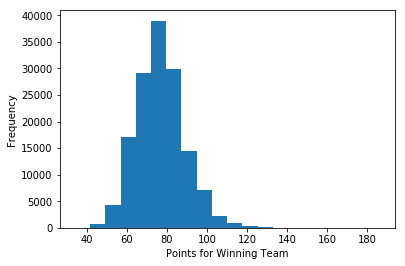

In [19]:
ax = df['Wscore'].plot.hist(bins=20)
ax.set_xlabel('Points for Winning Team')

create a CSV file

In [20]:
import numpy as np
import csv

results = [[0,10],[1,15],[2,20]]
results = pd.np.array(results)
print(results)

[[ 0 10]
 [ 1 15]
 [ 2 20]]


In [21]:
firstRow = [['id', 'pred']]
with open("result.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerows(firstRow)
    writer.writerows(results)

The approach I described above deals more with python lists and numpy. If you want a purely Pandas based approach, take a look at this video: https://www.youtube.com/watch?v=ylRlGCtAtiE&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=22

# Other Useful Functions

* **drop()** - This function removes the column or row that you pass in (You also have the specify the axis). 
* **agg()** - The aggregate function lets you compute summary statistics about each group
* **apply()** - Lets you apply a specific function to any/all elements in a Dataframe or Series
* **get_dummies()** - Helpful for turning categorical data into one hot vectors.
* **drop_duplicates()** - Lets you remove identical rows